<a href="https://colab.research.google.com/github/stonewallmhk/QuantMindi/blob/main/Normalize_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

In [7]:
def download_data(stock, start_date, end_date):
  data = {}
  ticker = yf.download(stock, start_date, end_date)
  data['Price'] = ticker['Adj Close']
  return pd.DataFrame(data)


def calculate_returns(stock_data):
  stock_data['Price'] = np.log(stock_data['Price'] / stock_data['Price'].shift(1))
  return stock_data[1:]


def show_plot(stock_data):
  plt.hist(stock_data, bins=700)
  stock_variance = stock_data.var()
  stock_mean = stock_data.mean()
  sigma = np.sqrt(stock_variance)
  x = np.linspace(stock_mean - 3 * sigma, stock_mean + 3 * sigma, 100)
  plt.plot(x, norm.pdf(x, stock_mean, sigma))
  plt.show()

[*********************100%***********************]  1 of 1 completed


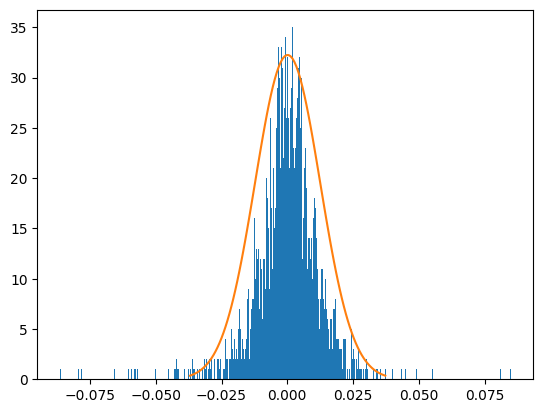

In [8]:
if __name__ == "__main__":
  stock = download_data('IBM', '2010-01-01', '2020-01-01')
  log_daily_returns = calculate_returns(stock)
  show_plot(log_daily_returns)